In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

/home/cassius/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cassius/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cassius/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cassius/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
gerador_teste = ImageDataGenerator(rescale = 1./255)

base_treinamento = gerador_treinamento.flow_from_directory('dataset/dataset/training_set',
                                                           target_size = (64, 64),
                                                           batch_size = 32,
                                                           class_mode = 'binary')

base_treinamento

Found 4000 images belonging to 2 classes.


In [4]:
base_teste = gerador_teste.flow_from_directory('dataset/dataset/test_set',
                                               target_size = (64, 64),
                                               batch_size = 32,
                                               class_mode = 'binary')
base_teste

Found 1000 images belonging to 2 classes.


In [5]:
classificador.fit_generator(base_treinamento, steps_per_epoch = 4000 / 32,
                            epochs = 10, validation_data = base_teste,
                            validation_steps = 1000 / 32)

2022-05-28 00:36:39.828960: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-05-28 00:36:39.856392: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999965000 Hz
2022-05-28 00:36:39.856732: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55edb70c23b0 executing computations on platform Host. Devices:
2022-05-28 00:36:39.856750: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-05-28 00:36:39.857931: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Could not dlopen library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-28 00:36:39.857942: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-28 00:36:39.857957: I tensorflow/stream_executor/cuda/cuda_

Epoch 1/10
125/125 [==============================] - 19s 149ms/step - loss: 0.7938 - acc: 0.5658 - val_loss: 1.5890 - val_acc: 0.5000
Epoch 2/10
125/125 [==============================] - 21s 171ms/step - loss: 0.6635 - acc: 0.6152 - val_loss: 3.7705 - val_acc: 0.4980
Epoch 3/10
125/125 [==============================] - 21s 169ms/step - loss: 0.6429 - acc: 0.6223 - val_loss: 1.0954 - val_acc: 0.5390
Epoch 4/10
125/125 [==============================] - 21s 169ms/step - loss: 0.6229 - acc: 0.6585 - val_loss: 0.9380 - val_acc: 0.5560
Epoch 5/10
125/125 [==============================] - 21s 170ms/step - loss: 0.5982 - acc: 0.6727 - val_loss: 0.6287 - val_acc: 0.6650
Epoch 6/10
125/125 [==============================] - 21s 169ms/step - loss: 0.5813 - acc: 0.6873 - val_loss: 0.6086 - val_acc: 0.6720
Epoch 7/10
125/125 [==============================] - 21s 169ms/step - loss: 0.5561 - acc: 0.7085 - val_loss: 0.6065 - val_acc: 0.6830
Epoch 8/10
125/125 [==============================] - 2

In [6]:
imagem_teste = image.load_img('dataset/dataset/test_set/gato/cat.3500.jpg', target_size=(64,64))

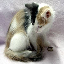

In [7]:
imagem_teste

In [8]:
imagem_teste = image.img_to_array(imagem_teste)
imagem_teste

array([[[196., 195., 201.],
        [195., 194., 200.],
        [209., 208., 214.],
        ...,
        [191., 188., 195.],
        [193., 190., 197.],
        [189., 186., 193.]],

       [[204., 203., 209.],
        [206., 205., 211.],
        [194., 193., 199.],
        ...,
        [192., 189., 196.],
        [197., 194., 201.],
        [187., 184., 191.]],

       [[196., 195., 201.],
        [196., 195., 201.],
        [193., 192., 198.],
        ...,
        [191., 188., 195.],
        [189., 186., 193.],
        [178., 175., 182.]],

       ...,

       [[250., 250., 250.],
        [249., 249., 249.],
        [252., 252., 252.],
        ...,
        [230., 228., 229.],
        [234., 232., 233.],
        [249., 247., 248.]],

       [[248., 248., 248.],
        [251., 251., 251.],
        [249., 249., 249.],
        ...,
        [226., 224., 225.],
        [231., 229., 230.],
        [248., 246., 247.]],

       [[249., 249., 249.],
        [247., 247., 247.],
        [245., 2

In [9]:
imagem_teste /= 255
imagem_teste

array([[[0.76862746, 0.7647059 , 0.7882353 ],
        [0.7647059 , 0.7607843 , 0.78431374],
        [0.81960785, 0.8156863 , 0.8392157 ],
        ...,
        [0.7490196 , 0.7372549 , 0.7647059 ],
        [0.75686276, 0.74509805, 0.77254903],
        [0.7411765 , 0.7294118 , 0.75686276]],

       [[0.8       , 0.79607844, 0.81960785],
        [0.80784315, 0.8039216 , 0.827451  ],
        [0.7607843 , 0.75686276, 0.78039217],
        ...,
        [0.7529412 , 0.7411765 , 0.76862746],
        [0.77254903, 0.7607843 , 0.7882353 ],
        [0.73333335, 0.72156864, 0.7490196 ]],

       [[0.76862746, 0.7647059 , 0.7882353 ],
        [0.76862746, 0.7647059 , 0.7882353 ],
        [0.75686276, 0.7529412 , 0.7764706 ],
        ...,
        [0.7490196 , 0.7372549 , 0.7647059 ],
        [0.7411765 , 0.7294118 , 0.75686276],
        [0.69803923, 0.6862745 , 0.7137255 ]],

       ...,

       [[0.98039216, 0.98039216, 0.98039216],
        [0.9764706 , 0.9764706 , 0.9764706 ],
        [0.9882353 , 0

In [10]:
imagem_teste = np.expand_dims(imagem_teste, axis=0)
imagem_teste.shape

(1, 64, 64, 3)

In [11]:
previsao = classificador.predict(imagem_teste)
previsao

array([[0.942804]], dtype=float32)

In [12]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

In [14]:
imagem_teste = image.load_img('dataset/dataset/test_set/cachorro/dog.3500.jpg', target_size=(64,64))
imagem_teste = image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis=0)
imagem_teste

array([[[[0.47058824, 0.49019608, 0.46666667],
         [0.41568628, 0.43529412, 0.4117647 ],
         [0.44705883, 0.46666667, 0.44313726],
         ...,
         [0.22745098, 0.16470589, 0.11372549],
         [0.25490198, 0.14901961, 0.11372549],
         [0.27450982, 0.13725491, 0.11372549]],

        [[0.4117647 , 0.43137255, 0.40784314],
         [0.5058824 , 0.5254902 , 0.5019608 ],
         [0.5254902 , 0.54509807, 0.52156866],
         ...,
         [0.23529412, 0.15686275, 0.11372549],
         [0.25882354, 0.16470589, 0.1254902 ],
         [0.27058825, 0.15686275, 0.1254902 ]],

        [[0.49411765, 0.5137255 , 0.49019608],
         [0.5137255 , 0.53333336, 0.50980395],
         [0.4627451 , 0.48235294, 0.45882353],
         ...,
         [0.2509804 , 0.15686275, 0.11764706],
         [0.2509804 , 0.16470589, 0.12156863],
         [0.24705882, 0.16078432, 0.11764706]],

        ...,

        [[0.61960787, 0.64705884, 0.7176471 ],
         [0.7372549 , 0.7764706 , 0.8156863 ]

In [17]:
previsao = classificador.predict(imagem_teste)
previsao

array([[0.8446956]], dtype=float32)